# Traning an image classifier for MNIST (in style of PyTorch BLITZ tutorial) 

### imports and data wrangling 

In [2]:
import torch 
import torchvision
import torchvision.transforms as transforms

In [10]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, 
                                      download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, 
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=True, num_workers=2)

classes = ('zero', 'one', 'two', 'three', 'four', 'five',
         'six', 'seven', 'eight', 'nine')


                                    

### show a batch of data 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


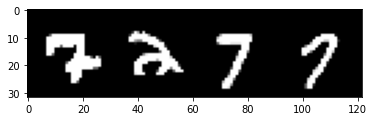

seven   two seven seven


In [60]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img #/ 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### define the network and forward function 

In [25]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)
        

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)


In [20]:
#test with random
#input = torch.randn(1, 1, 28, 28)
#out = net(input)
#print(out)

### define the optimizer 

In [26]:
import torch.optim as optim

#criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.5)


### train the network

In [61]:
for epoch in range(3):
    net.train()
    for i, (data, target) in enumerate(trainloader):
        data, target = data, target
        optimizer.zero_grad()
        output = net(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        
        if i % 2000 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, i * len(data), len(trainloader.dataset), 
            100 * i / len(trainloader), loss.item()))
        

Train Epoch: 0 [0/60000 (0%)]	Loss: 0.000486
Train Epoch: 0 [8000/60000 (13%)]	Loss: 0.004780
Train Epoch: 0 [16000/60000 (27%)]	Loss: 0.003200
Train Epoch: 0 [24000/60000 (40%)]	Loss: 0.000106
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.006026
Train Epoch: 0 [40000/60000 (67%)]	Loss: 0.065514
Train Epoch: 0 [48000/60000 (80%)]	Loss: 0.000085
Train Epoch: 0 [56000/60000 (93%)]	Loss: 0.001435
Train Epoch: 1 [0/60000 (0%)]	Loss: 0.100421
Train Epoch: 1 [8000/60000 (13%)]	Loss: 0.000014
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.055808
Train Epoch: 1 [24000/60000 (40%)]	Loss: 0.000155
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.034237
Train Epoch: 1 [40000/60000 (67%)]	Loss: 0.021295
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.000020
Train Epoch: 1 [56000/60000 (93%)]	Loss: 0.184054
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.000060
Train Epoch: 2 [8000/60000 (13%)]	Loss: 0.003556
Train Epoch: 2 [16000/60000 (27%)]	Loss: 0.014771
Train Epoch: 2 [24000/60000 (40%)]	Loss: 0.000417
Train Epoch: 2 [32

#### safe the trained network 

In [62]:
PATH = './mnist_net.pth'
torch.save(net.state_dict(), PATH)

### test the trained network on  test data batch 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


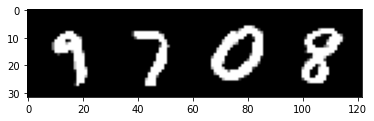

GroundTruth:   nine seven  zero eight


In [63]:
dataiter = iter(testloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [64]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:   nine seven  zero eight


###  performance on the whole dataset

In [37]:
correct = 0
total = 0 
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the trained network on the MNIST dataset: %d %%' % (
100 * correct / total))

Accuracy of the trained network on the MNIST dataset: 98 %


In [38]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of  zero : 99 %
Accuracy of   one : 99 %
Accuracy of   two : 99 %
Accuracy of three : 99 %
Accuracy of  four : 99 %
Accuracy of  five : 98 %
Accuracy of   six : 98 %
Accuracy of seven : 98 %
Accuracy of eight : 98 %
Accuracy of  nine : 98 %
